<a href="https://colab.research.google.com/github/prasanth5reddy/D2L/blob/master/Multilayer%20Perceptrons/implementation_of_multilayer_perceptron_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab/D2L.AI/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Installing Libraries

In [2]:
!pip install mxnet

Importing Libraries

In [0]:
%matplotlib inline
import d2l
from mxnet import nd
from mxnet.gluon import loss as gloss

Getting the Data

In [0]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

Initialize Model Parameters

In [0]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256
W1 = nd.random.normal(scale=0.01, shape=(num_inputs, num_hiddens))
b1 = nd.zeros(num_hiddens)
W2 = nd.random.normal(scale=0.01, shape=(num_hiddens, num_outputs))
b2 = nd.zeros(num_outputs)
params = [W1, b1, W2, b2]

for param in params:
  param.attach_grad()

Activation Function

In [0]:
def relu(X):
  return nd.maximum(X, 0)

The Model

In [0]:
def net(X):
  X = X.reshape(shape=(-1, num_inputs))
  H = relu(nd.dot(X, W1) + b1)
  return nd.dot(H, W2) + b2

The Loss Function

In [0]:
loss = gloss.SoftmaxCELoss()

Training

In [9]:
num_epochs, lr = 10, 0.5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 0.8054, train acc 0.699, test acc 0.818
epoch 2, loss 0.4897, train acc 0.820, test acc 0.846
epoch 3, loss 0.4282, train acc 0.841, test acc 0.852
epoch 4, loss 0.3992, train acc 0.852, test acc 0.866
epoch 5, loss 0.3738, train acc 0.861, test acc 0.870
epoch 6, loss 0.3569, train acc 0.868, test acc 0.874
epoch 7, loss 0.3454, train acc 0.872, test acc 0.880
epoch 8, loss 0.3293, train acc 0.878, test acc 0.871
epoch 9, loss 0.3201, train acc 0.882, test acc 0.875
epoch 10, loss 0.3091, train acc 0.885, test acc 0.882


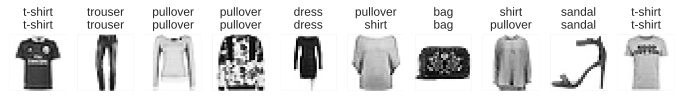

In [10]:
for X, y in test_iter:
  break

true_labels = d2l.get_fashion_mnist_labels(y.asnumpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1).asnumpy())
titles = [truelabel + '\n' + predlabel for truelabel, predlabel in zip(true_labels, pred_labels)]

d2l.show_fashion_mnist(X[:10], titles[:10])